In [108]:
from dotenv import load_dotenv
from typing import Annotated,Sequence,TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from pydantic import BaseModel,Field
# from rag we can import prompt from hub
from langchain import hub
from typing import Literal
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings

load_dotenv()


True

In [ ]:
#Load embedding model

embedding_model  = HuggingFaceEmbeddings(model= "BAAI/bge-base-en-v1.5")
model = ChatGroq(model="openai/gpt-oss-20b")

# Data Ingestion

In [3]:
url = "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [4]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
web_loader = WebBaseLoader(url)

In [6]:
internet_data = web_loader.load()

In [7]:
internet_data

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [8]:
internet_data[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [9]:
print(internet_data[0].metadata["description"])

Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview
In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:

Planning

Subgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.
Reflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.


Memory

Short-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.
Lon

In [10]:
internet_data[0].page_content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The

In [11]:
# taking mutiple url
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"
]
docs =[]

In [12]:
internet_docs = [WebBaseLoader(url).load() for url in urls]


In [13]:
# convert into single list

docs_list = [item for sublist in internet_docs for item in sublist]
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

# Chuncking

In [14]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [15]:
text_spliter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size = 1000,chunk_overlap= 25)

In [16]:
docs_splits = text_spliter.split_documents(docs_list)

# Data Retriever

In [17]:
# Reteriever
from langchain_community.vectorstores import Chroma

In [111]:
docs_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [ ]:
vectorstorage = Chroma.from_documents(
    documents= docs_splits,
    collection_name="Agentic_rag_chroma",
    embedding=embedding_model,
    collection_metadata=
)

In [19]:
retriever = vectorstorage.as_retriever()

In [20]:
retriever.invoke("what is agent and rag?")

[Document(metadata={'language': 'en', 'title': "Prompt Engineering | Lil'Log", 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/'}, page_content='RAG style, $p(a_i \\mid q) = \\sum_{i=1}^n p_\\text{tf-idf} (p_i \\mid q) \\cdot p_\\text{LM}(a_i \\mid q, p_i)$, where $p_\\text{tf-idf} (p_i \\mid q)$ is the normalized cos

In [21]:
from langchain.tools.retriever import create_retriever_tool

In [22]:
retriever_tool = create_retriever_tool(retriever,
                      "retriever_blog_post",
                      "search and return information from blog of agentic and prompt engineering")

In [23]:
# list of tools
tools = [retriever_tool]

In [24]:
# calling ToolNode
from langgraph.prebuilt import ToolNode

In [25]:
retriever_node = ToolNode(tools)

In [27]:

# Custom state
class AgenticState(TypedDict):
    messages: Annotated[Sequence[BaseMessage],add_messages]


In [28]:
from langchain_core.prompts import PromptTemplate

# Langgraph Orchestration

In [ ]:
# method 1 
def LLM_Decision_Maker(state:AgenticState):
    print("----CALL LLM DECISION MAKER-----")
    message = state["messages"]

    if len(message) > 1:
        last_message = message[-1]
        question = last_message.content
        prompt = PromptTemplate(
            template="""You are helpfull assistant whatever question has been ask to 
            find that in the given question and answer
            Here is the question :{question}""",
            input_variables= ["question"]
    )
        chain = prompt|model
        response = chain.invoke({"question":question})
        return {"message":[response]}
        
    else:
        llm_with_tool = model.bind_tools(tools)
        response = llm_with_tool.invoke(message)
        return {"messages":[response]}   

In [39]:
# Grad Class is pydantic class
class grade(BaseModel):
    binary_score:str=Field(description="Relvance score 'yes' or 'no'")
    

In [83]:
def grad_documents(state:AgenticState)->Literal["Output Generator","Query rewrite"]:

    print("----Grad Function-------------")
    llm_with_structured = model.with_structured_output(grade)

    prompt = PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"])
    
    chain = prompt|llm_with_structured 


    message = state["messages"]

    last_message = message[-1]

    docs = last_message.content

    question = message[0].content

    scored_result = chain.invoke({"question":question,"context":docs})

    print("Document Grade:",scored_result)
    score =scored_result.binary_score

    if score == "yes":
        print("-----Docs are relevant to Question")
        return "generate"
    else:
        print("----Docs  are not relevant to Question")
        return "rewrite"




In [84]:
hub.pull("rlm/rag-prompt")

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [85]:
def generate(state:AgenticState):

    print("------------RAG Output Generator---------------")
    message = state["messages"]

    question = message[0].content

    last_message= message[-1]

    docs = last_message.content

    prompt = hub.pull("rlm/rag-prompt")

    rag_chain = prompt|model

    response = rag_chain.invoke({"context":docs,"question":question})
    print(f"this is my response:{response}")

    return {"messages":[response]}
    

In [86]:
from langchain.schema import HumanMessage

def rewrite(state:AgenticState):

    print("---Transformation Query---")

    message = state["messages"]

    question = message[0].content

    input = [HumanMessage(content = f"""Look at input and try to reason about about the underlying
                          semantic meaning and understanding.
                          Here is the initial question {question}
                          Formulate an improved question:""")]
    

    response = model.invoke(input)
    return {"messages":[response]}
    

In [87]:
# graph
from langgraph.graph import END,StateGraph,START
from langgraph.prebuilt import tools_condition

In [88]:
workflow = StateGraph(AgenticState)

In [89]:
workflow.add_node("LLM Decision Maker" ,LLM_Decision_Maker)
workflow.add_node("vector retriever", retriever_node)
workflow.add_node("Output Generator", generate)
workflow.add_node("Query rewrite", rewrite)

In [90]:
workflow.add_edge(START,"LLM Decision Maker")

In [91]:
# tool condition
workflow.add_conditional_edges("LLM Decision Maker",
                               tools_condition,
                               {"tools":"vector retriever",
                                END:END})

In [92]:
# tool condition
workflow.add_conditional_edges("vector retriever",
                               grad_documents,
                               {"generate":"Output Generator",
                                "rewrite":"Query rewrite"})

In [93]:
workflow.add_edge("Output Generator",END)
workflow.add_edge("Query rewrite","LLM Decision Maker")

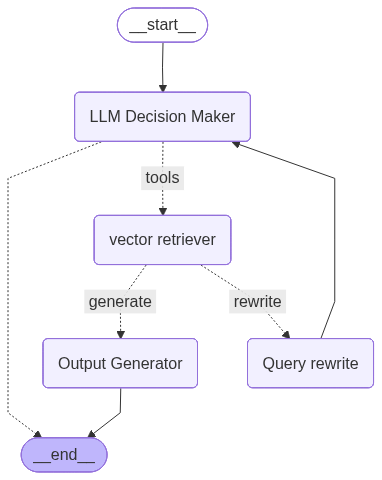

In [94]:
workflow.compile()

In [95]:
app = workflow.compile()

In [98]:
app.invoke({'messages':["What is agentic ai?"]})

----CALL LLM DECISION MAKER-----
----Grad Function-------------
Document Grade: binary_score='yes'
-----Docs are relevant to Question
------------RAG Output Generator---------------
this is my response:content='Agentic AI refers to artificial intelligence systems that can act autonomously, making decisions and taking actions without constant human instruction. It typically combines large language models with planning, self‑reflection, and tool‑use modules so the agent can decompose tasks, reason step‑by‑step, and interact with external APIs or environments. Examples include LLM‑powered autonomous agents such as ReAct, Reflexion, and AutoGPT.' additional_kwargs={'reasoning_content': 'We need to answer: "What is agentic ai?" Using context. The context describes LLM-powered autonomous agents, planning, self-reflection, etc. So agentic AI refers to AI systems that can act autonomously, plan, reason, and interact with environment, often using LLMs. Provide concise answer: three sentences ma

{'messages': [HumanMessage(content='What is agentic ai?', additional_kwargs={}, response_metadata={}, id='c9bc79ac-4379-4a52-bf1b-9aa2387004e2'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "What is agentic ai?" We need to answer. We have a tool to search blog posts. We could use the function to retrieve info from a blog. Let\'s search for agentic AI.', 'tool_calls': [{'id': 'fc_91e0fa70-d6b4-41a5-9d62-46a39f7258c2', 'function': {'arguments': '{"query":"agentic AI"}', 'name': 'retriever_blog_post'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 142, 'total_tokens': 215, 'completion_time': 0.072991983, 'prompt_time': 0.006952191, 'queue_time': 0.042315129, 'total_time': 0.079944174}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_c5a89987dc', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b58682ea-bbb1-42c7-bbaa-7518f52dca6f-0', tool_calls=[{'

In [100]:

response = app.invoke({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]})

----CALL LLM DECISION MAKER-----
----Grad Function-------------
Document Grade: binary_score='yes'
-----Docs are relevant to Question
------------RAG Output Generator---------------
this is my response:content='LLM‑powered autonomous agents are systems where a large language model acts as the agent’s “brain”, orchestrating planning, memory, and tool use to complete tasks. In LangChain, the **planning** component is implemented with chain‑of‑thought or Tree‑of‑Thought prompts that decompose a goal into sub‑goals, while **reflection** is handled by ReAct‑style or Reflexion loops that let the model review its actions, correct mistakes, and refine future steps. Prompt engineering supplies the LLM with these structured templates—e.g., “Thought: … Action: … Observation: …”—so the agent can reason, act, and self‑critique within a unified framework.' additional_kwargs={'reasoning_content': 'We need to answer: what is LLM Powered Autonomous Agents explain planning and reflection and prompt engi

In [106]:
print(response["messages"][-1].content)

LLM‑powered autonomous agents are systems where a large language model acts as the agent’s “brain”, orchestrating planning, memory, and tool use to complete tasks. In LangChain, the **planning** component is implemented with chain‑of‑thought or Tree‑of‑Thought prompts that decompose a goal into sub‑goals, while **reflection** is handled by ReAct‑style or Reflexion loops that let the model review its actions, correct mistakes, and refine future steps. Prompt engineering supplies the LLM with these structured templates—e.g., “Thought: … Action: … Observation: …”—so the agent can reason, act, and self‑critique within a unified framework.


In [57]:
app.invoke({"messages":["hi, how are you?"]})

----CALL LLM DECISION MAKER-----


{'messages': [HumanMessage(content='hi, how are you?', additional_kwargs={}, response_metadata={}, id='4393b81c-2a92-4be1-b8a2-b8ccf0397a7d'),
  AIMessage(content='Hi! I’m doing great—thanks for asking. How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond. The user says "hi, how are you?" This is a greeting. We can respond politely. No tool needed.'}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 142, 'total_tokens': 199, 'completion_time': 0.056326408, 'prompt_time': 0.006861409, 'queue_time': 0.042942802, 'total_time': 0.063187817}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_c5a89987dc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2ff5e474-3cb1-4b9a-a1f4-c76ef8a42b69-0', usage_metadata={'input_tokens': 142, 'output_tokens': 57, 'total_tokens': 199})]}

In [59]:
app.invoke({"messages":["what is prompt engineering?"]})

----CALL LLM DECISION MAKER-----


{'messages': [HumanMessage(content='what is prompt engineering?', additional_kwargs={}, response_metadata={}, id='4b9f19d6-37b4-4f40-9756-34a5b677d2e4'),
  AIMessage(content='**Prompt engineering** is the practice of crafting, refining, and optimizing the text you feed to a language model (like GPT‑4) so that it produces the most useful, accurate, and relevant responses. It’s essentially “engineering” the input to get the output you want.\n\n| What you do | Why it matters | Typical techniques |\n|-------------|----------------|--------------------|\n| **Define the task** | A clear goal helps the model focus | Use a short, explicit instruction (e.g., “Explain the theory of relativity in simple terms.”) |\n| **Add context** | More information reduces ambiguity | Include background or constraints (“Assume the reader knows basic physics.”) |\n| **Format the prompt** | Structure can guide the answer | Use bullet points, tables, or role‑play (“You are a senior software engineer.”) |\n| **Ite

In [107]:
app.invoke({"messages":["what is a capital of india?"]})

----CALL LLM DECISION MAKER-----


{'messages': [HumanMessage(content='what is a capital of india?', additional_kwargs={}, response_metadata={}, id='3b7fa6a2-6ea0-42a6-b7b4-788821e25d84'),
  AIMessage(content='The capital of India is **New\u202fDelhi**.', additional_kwargs={'reasoning_content': 'User asks: "what is a capital of india?" They want answer: New Delhi. No need for blog. So answer.'}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 143, 'total_tokens': 190, 'completion_time': 0.047936345, 'prompt_time': 0.006979331, 'queue_time': 0.043235919, 'total_time': 0.054915676}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_80501ff3a1', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--3b1e1142-2792-4965-9740-a47a2005ddc4-0', usage_metadata={'input_tokens': 143, 'output_tokens': 47, 'total_tokens': 190})]}